# 메타 데이터(프로필 데이터) 탐색적 분석 (EDA) 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
from datetime import datetime, timedelta
np.random.seed(1)

In [3]:
meta_dataset = pd.read_csv('./data_2015_2019/meta_dataset_2015_2019.csv')

In [3]:
meta_dataset

category_name  location_name country_displayable_name      usd_goal  \
0        Graphic Novels    Minneapolis        the United States  12000.000000   
1          Architecture       New York        the United States    500.000000   
2       Gaming Hardware        Oshkosh        the United States  10000.000000   
3                 Drama     Manchester       the United Kingdom    998.226229   
4                Flight  South Florida        the United States  17500.000000   
...                 ...            ...                      ...           ...   
153571      Accessories         Sydney                Australia    393.166059   
153572      Accessories         London       the United Kingdom   1305.500070   
153573              Web         Prague                  Germany   7893.879210   
153574            Faith     Washington        the United States  20000.000000   
153575         Textiles        Seattle        the United States    700.000000   

        set_fundraising_period  target_goal_period_rate  date_launched_year  \
0                      2592000                 0.004630                2015   
1                      2588400                 0.000193                2015   
2                      3884400                 0.002574                2015   
3                      2306670                 0.000433                2015   
4                      3020400                 0.005794                2015   
...                        ...                      ...                 ...   
153571                 2592000                 0.000152                2019   
153572                 2592000                 0.000504                2019   
153573                 1728000                 0.004568                2019   
153574                 5011887                 0.003991                2019   
153575                 2657079                 0.000263                2019   

        date_launched_month  launching_delay_time  disable_communication  \
0                         8                871654                  False   
1                         2               1407876                  False   
2                         2                 16110                  False   
3                         3                  8063                  False   
4                         3               1965192                  False   
...                     ...                   ...                    ...   
153571                    3                655598                  False   
153572                    4                171726                  False   
153573                    4                245102                  False   
153574                    4               2599879                  False   
153575                    6               2568846                  False   

        is_starrable       state  
0              False  successful  
1              False  successful  
2              False  successful  
3              False      failed  
4              False  successful  
...              ...         ...  
153571         False  successful  
153572         False  successful  
153573         False      failed  
153574         False      failed  
153575         False      failed  

[153576 rows x 12 columns]

## 데이터 탐색(EDA)

In [5]:
meta_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153576 entries, 0 to 153575
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   category_name             153576 non-null  object 
 1   location_name             153576 non-null  object 
 2   country_displayable_name  153576 non-null  object 
 3   usd_goal                  153576 non-null  float64
 4   set_fundraising_period    153576 non-null  int64  
 5   target_goal_period_rate   153576 non-null  float64
 6   date_launched_year        153576 non-null  int64  
 7   date_launched_month       153576 non-null  int64  
 8   launching_delay_time      153576 non-null  int64  
 9   disable_communication     153576 non-null  bool   
 10  is_starrable              153576 non-null  bool   
 11  state                     153576 non-null  object 
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 12.0+ MB


In [6]:
# 결측치 확인
meta_dataset.isna().sum()

category_name               0
location_name               0
country_displayable_name    0
usd_goal                    0
set_fundraising_period      0
target_goal_period_rate     0
date_launched_year          0
date_launched_month         0
launching_delay_time        0
disable_communication       0
is_starrable                0
state                       0
dtype: int64

In [24]:
# 타깃('state') 분포 확인
print(meta_dataset['state'].value_counts())
print(meta_dataset['state'].value_counts(normalize=True))

successful    93112
failed        60464
Name: state, dtype: int64
successful    0.606293
failed        0.393707
Name: state, dtype: float64


In [110]:
# 카테고리(유형)별 펀딩 프로젝트 수 (상위 50개)
category_counts = meta_dataset['category_name'].value_counts().head(50)
category_counts

Web                 3989
Product Design      3773
Tabletop Games      3615
Accessories         3493
Comic Books         3430
Illustration        2953
Graphic Novels      2744
Documentary         2703
Comedy              2693
Gadgets             2682
Drinks              2662
Children's Books    2581
Restaurants         2553
Apparel             2461
Playing Cards       2421
Photobooks          2357
Drama               2340
Apps                2324
Shorts              2278
Software            2016
Hip-Hop             2006
Video Games         2000
Art Books           1928
Plays               1904
Hardware            1862
Small Batch         1803
Painting            1711
Country & Folk      1592
Mixed Media         1590
Food Trucks         1579
Nonfiction          1540
Mobile Games        1530
Performances        1501
Fiction             1478
Jewelry             1424
Woodworking         1418
Animation           1338
Pop                 1329
Graphic Design      1320
Anthologies         1309


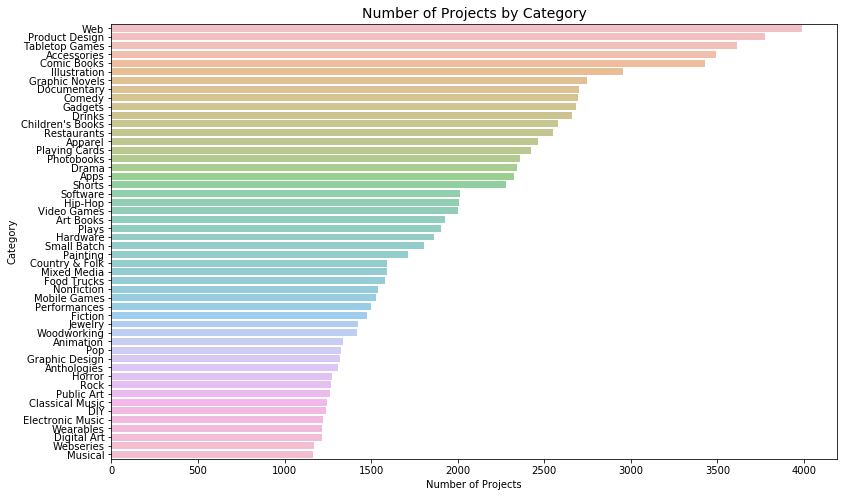

In [114]:
# 카테고리(유형)별 펀딩 프로젝트 수 그래프
plt.figure(figsize=(13,8))
sns.barplot(x=category_counts.values, y=category_counts.index, alpha=0.6)
plt.title("Number of Projects by Category", fontsize=14)
plt.xlabel("Number of Projects", fontsize=10)
plt.ylabel("Category", fontsize=10)
plt.show()

In [ ]:
# 가장 수가 많은 펀딩 카테고리(유형) top 6: Web, Product Design, Tabletop Games, Accessories, Comic Books, Illustration

In [116]:
# 성공/실패별 펀딩 프로젝트 유형
state_category = meta_dataset.groupby('state')['category_name'].value_counts()
state_category

state       category_name  
failed      Web                3318
            Apps               1801
            Restaurants        1752
            Hip-Hop            1704
            Software           1696
                               ... 
successful  Quilts               26
            Chiptune             25
            Social Practice      23
            Bacon                15
            Taxidermy             4
Name: category_name, Length: 292, dtype: int64

Text(0, 0.5, 'Categories')

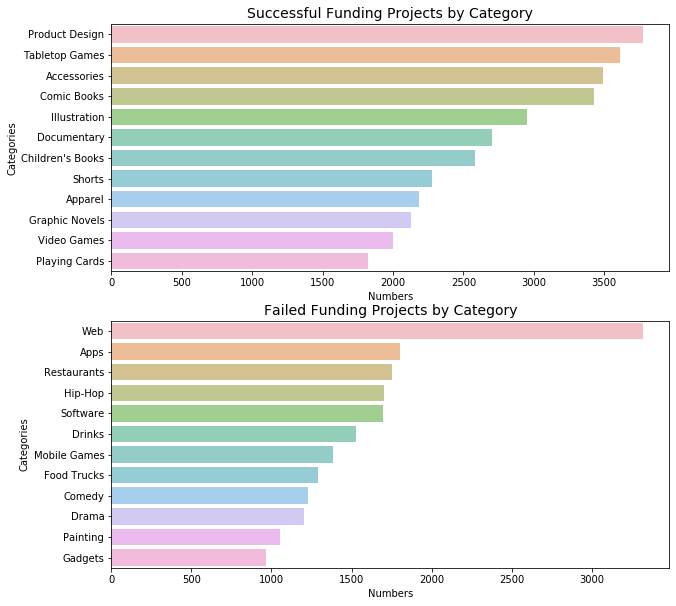

In [129]:
# 성공/실패별 펀딩 프로젝트 그래프 (상위 12개)
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
a1 = sns.barplot(y=state_category['successful'].index[:12], x=state_category['successful'].values[:12], alpha=0.6)
a1.set_title("Successful Funding Projects by Category", fontsize=14)
a1.set_xlabel("Numbers", fontsize=10)
a1.set_ylabel("Categories", fontsize=10)

plt.subplot(2,1,2)
a2 = sns.barplot(y=state_category['failed'].index[:12], x=state_category['failed'].values[:12], alpha=0.6)
a2.set_title("Failed Funding Projects by Category", fontsize=14)
a2.set_xlabel("Numbers", fontsize=10)
a2.set_ylabel("Categories", fontsize=10)

In [ ]:
# 모금에 성공한 펀딩 유형에는 Product Design, Tabletop Games, Accessories, Comic Books, Illustration 순으로 많았고
# 모금에 실패한 펀딩 유형에는 Web, Apps, Restaurants, Hip-Hop, Software, Drinks 순으로 많았음

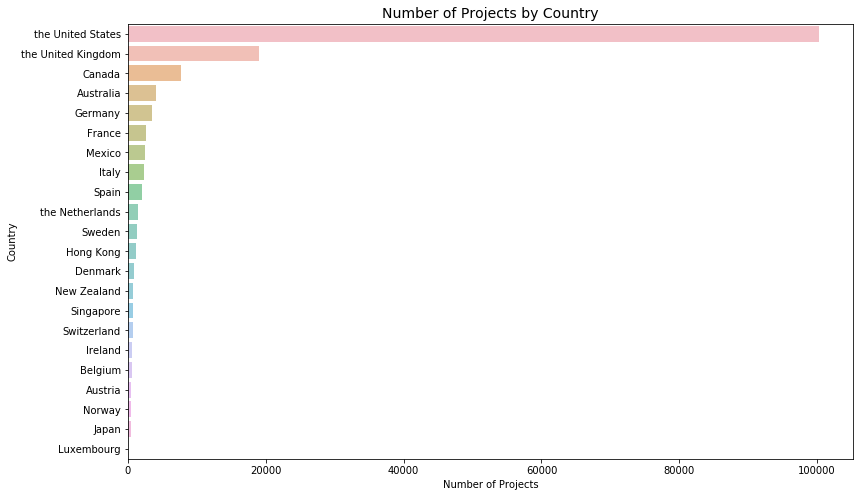

In [15]:
# 펀딩 프로젝트 개수 by 국가
country_counts = meta_dataset['country_displayable_name'].value_counts()
plt.figure(figsize=(13,8))
sns.barplot(x=country_counts.values, y=country_counts.index, alpha=0.6)
plt.title("Number of Projects by Country", fontsize=14)
plt.xlabel("Number of Projects", fontsize=10)
plt.ylabel("Country", fontsize=10)
plt.show()

In [18]:
# 연도 별 펀딩 프로젝트 개수
meta_dataset['date_launched_year'].value_counts().sort_index()

# 평균적으로 매년 30000개 정도의 성공/실패 펀딩 프로젝트가 있다

2015    34696
2016    27413
2017    26866
2018    27398
2019    37203
Name: date_launched_year, dtype: int64

In [28]:
# 월별 펀딩 프로젝트 수
meta_dataset['date_launched_month'].value_counts()

#3,10,5월에 펀딩이 가장 많고, 12월은 유독 적다 

3     14933
10    14902
5     14132
6     13706
4     13606
9     13028
2     12931
8     12833
7     12790
1     12105
11    11937
12     6673
Name: date_launched_month, dtype: int64

In [34]:
# 성공/실패별 월별 펀딩 개수
meta_dataset.groupby(meta_dataset['state'])['date_launched_month'].value_counts()

#성공한 펀딩이 가장 많은 달은 10월, 3월, 5월 순
#실패한 펀딩이 가장 많은 달은 3월, 5월, 4월 순
# 월은 성공/실패에 영향을 준다고 보기 어렵다

state       date_launched_month
failed      3                      5795
            5                      5643
            4                      5447
            2                      5381
            1                      5351
            6                      5322
            8                      5018
            10                     5006
            7                      4960
            9                      4818
            11                     4539
            12                     3184
successful  10                     9896
            3                      9138
            5                      8489
            6                      8384
            9                      8210
            4                      8159
            7                      7830
            8                      7815
            2                      7550
            11                     7398
            1                      6754
            12                     3489
Name: da

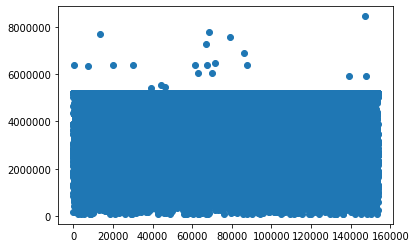

In [47]:
# 설정된 펀딩 기간 분포 확인
plt.scatter(x=meta_dataset['set_fundraising_period'].index, y=meta_dataset['set_fundraising_period'].values)
plt.show()

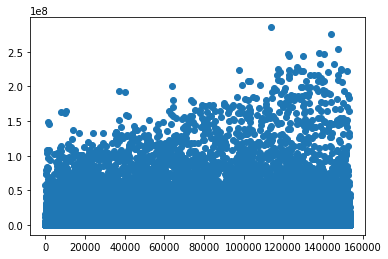

In [48]:
# 런칭 딜레이 기간 분포 확인
plt.scatter(x=meta_dataset['launching_delay_time'].index, y=meta_dataset['launching_delay_time'].values)
plt.show()

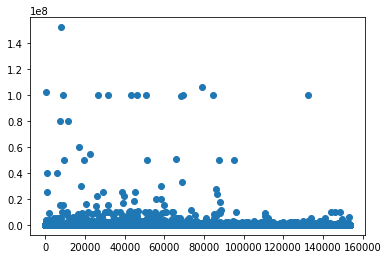

In [5]:
# 펀딩 목표액 분포 확인
plt.scatter(x=meta_dataset['usd_goal'].index, y=meta_dataset['usd_goal'].values)
plt.show()

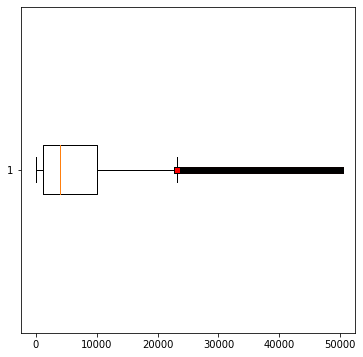

In [10]:
plt.figure(figsize=(6,6))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(meta_dataset['usd_goal'].sort_values(ascending=False)[10000:], flierprops=red_square, vert=False, whis=1.5)
plt.show()

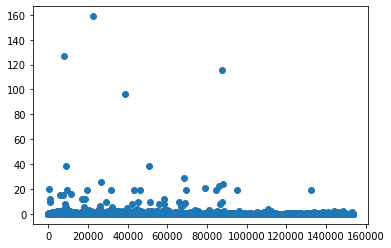

In [11]:
# 설정된 펀딩 기간대비 펀딩 목표액 비율 분포 확인
plt.scatter(x=meta_dataset['target_goal_period_rate'].index, y=meta_dataset['target_goal_period_rate'].values)
plt.show()

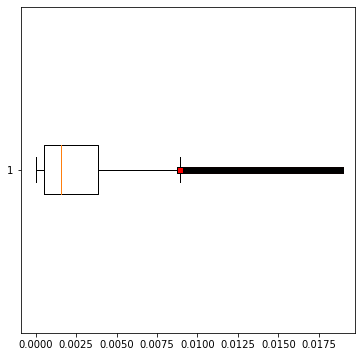

In [12]:
plt.figure(figsize=(6,6))
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot(meta_dataset['target_goal_period_rate'].sort_values(ascending=False)[10000:], flierprops=red_square, vert=False, whis=1.5)
plt.show()

## 이상치 확인 및 처리

In [39]:
#IQR 기반 이상치 검출
#IQR : 3분위수-1분위수
#이상치 기준 (rate는 일반적으로 1.5사용)
#1분위수 - IQR*rate 보다 작은수
#3분위 + IQR*rate 보다 큰수

def get_outlier(data, rate=1.5):
    q1 = np.quantile(data, q=0.25)
    q3 = np.quantile(data, q=0.75)
    IQR = q3 - q1
    return (data < q1 - IQR * rate) | (data > q3 + IQR * rate)

In [43]:
# usd_goal 컬럼 --> outlier 아닌 값들 중 최대값으로 대체
max_usd_goal = np.max(meta_dataset.usd_goal[~get_outlier(meta_dataset['usd_goal'])])
meta_dataset.loc[meta_dataset['usd_goal']>max_usd_goal, 'usd_goal'] = max_usd_goal

In [45]:
# target_goal_period_rate 컬럼 --> outlier 아닌 값들 중 최대값으로 대체
max_target_goal_period_rate = np.max(meta_dataset.target_goal_period_rate[~get_outlier(meta_dataset['target_goal_period_rate'])])
meta_dataset.loc[meta_dataset['target_goal_period_rate']>max_target_goal_period_rate, 'target_goal_period_rate'] = max_target_goal_period_rate

In [48]:
# 성공 예측 모델에 사용하지 않을 컬럼 추가적으로 제거
metadata = meta_dataset.drop(columns=['location_name','country_displayable_name','date_launched_year','date_launched_month'])
metadata

category_name      usd_goal  set_fundraising_period  \
0        Graphic Novels  12000.000000                 2592000   
1          Architecture    500.000000                 2588400   
2       Gaming Hardware  10000.000000                 3884400   
3                 Drama    998.226229                 2306670   
4                Flight  17500.000000                 3020400   
...                 ...           ...                     ...   
153571      Accessories    393.166059                 2592000   
153572      Accessories   1305.500070                 2592000   
153573              Web   7893.879210                 1728000   
153574            Faith  20000.000000                 5011887   
153575         Textiles    700.000000                 2657079   

        target_goal_period_rate  launching_delay_time  disable_communication  \
0                      0.004630                871654                  False   
1                      0.000193               1407876                  False   
2                      0.002574                 16110                  False   
3                      0.000433                  8063                  False   
4                      0.005794               1965192                  False   
...                         ...                   ...                    ...   
153571                 0.000152                655598                  False   
153572                 0.000504                171726                  False   
153573                 0.004568                245102                  False   
153574                 0.003991               2599879                  False   
153575                 0.000263               2568846                  False   

        is_starrable       state  
0              False  successful  
1              False  successful  
2              False  successful  
3              False      failed  
4              False  successful  
...              ...         ...  
153571         False  successful  
153572         False  successful  
153573         False      failed  
153574         False      failed  
153575         False      failed  

[153576 rows x 8 columns]

## Encoding & Scaling

In [ ]:
# label encoding : disable_communication, is_starrable, state
# one-hot encoding : category_name
# standard scaling : usd_goal, set_fundraising_period, target_goal_period_rate, launching_delay_time

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
col_to_label_encode = ['disable_communication', 'is_starrable', 'state']
col_to_oh_encode = ['category_name']
col_to_scale = ['usd_goal', 'set_fundraising_period', 'target_goal_period_rate', 'launching_delay_time']

In [16]:
#Label Encoding

def l_encoding(x):
    le = LabelEncoder()
    le.fit(x)
    l_encoded_x = le.transform(x)
    return l_encoded_x

In [49]:
col_to_label_encode = ['disable_communication', 'is_starrable', 'state']

metadata[col_to_label_encode] = metadata[col_to_label_encode].apply(l_encoding)
metadata[col_to_label_encode]

disable_communication  is_starrable  state
0                           0             0      1
1                           0             0      1
2                           0             0      1
3                           0             0      0
4                           0             0      1
...                       ...           ...    ...
153571                      0             0      1
153572                      0             0      1
153573                      0             0      0
153574                      0             0      0
153575                      0             0      0

[153576 rows x 3 columns]

In [50]:
#One-Hot Encoding -- Pandas.get_dummies()

col_to_oh_encode = ['category_name']

metadata = pd.get_dummies(metadata, columns=col_to_oh_encode)
metadata

usd_goal  set_fundraising_period  target_goal_period_rate  \
0       12000.000000                 2592000                 0.004630   
1         500.000000                 2588400                 0.000193   
2       10000.000000                 3884400                 0.002574   
3         998.226229                 2306670                 0.000433   
4       17500.000000                 3020400                 0.005794   
...              ...                     ...                      ...   
153571    393.166059                 2592000                 0.000152   
153572   1305.500070                 2592000                 0.000504   
153573   7893.879210                 1728000                 0.004568   
153574  20000.000000                 5011887                 0.003991   
153575    700.000000                 2657079                 0.000263   

        launching_delay_time  disable_communication  is_starrable  state  \
0                     871654                      0             0      1   
1                    1407876                      0             0      1   
2                      16110                      0             0      1   
3                       8063                      0             0      0   
4                    1965192                      0             0      1   
...                      ...                    ...           ...    ...   
153571                655598                      0             0      1   
153572                171726                      0             0      1   
153573                245102                      0             0      0   
153574               2599879                      0             0      0   
153575               2568846                      0             0      0   

        category_name_3D Printing  category_name_Academic  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
153571                          0                       0   
153572                          0                       0   
153573                          0                       0   
153574                          0                       0   
153575                          0                       0   

        category_name_Accessories  ...  category_name_Wearables  \
0                               0  ...                        0   
1                               0  ...                        0   
2                               0  ...                        0   
3                               0  ...                        0   
4                               0  ...                        0   
...                           ...  ...                      ...   
153571                          1  ...                        0   
153572                          1  ...                        0   
153573                          0  ...                        0   
153574                          0  ...                        0   
153575                          0  ...                        0   

        category_name_Weaving  category_name_Web  category_name_Webcomics  \
0                           0                  0                        0   
1                           0                  0                        0   
2                           0                  0                        0   
3                           0                  0                        0   
4                           0                  0                        0   
...                       ...                ...                      ...   
153571                      0                  0                        0   
153572                      0                  0                    

In [51]:
#Standard Scaling

col_to_scale = ['usd_goal', 'set_fundraising_period', 'target_goal_period_rate', 'launching_delay_time']

s_scaler = StandardScaler()
metadata[col_to_scale] = s_scaler.fit_transform(metadata[col_to_scale])
metadata[col_to_scale]

usd_goal  set_fundraising_period  target_goal_period_rate  \
0      -0.025104               -0.209350                -0.015407   
1      -0.035191               -0.212905                -0.021688   
2      -0.026858                1.066828                -0.018317   
3      -0.034754               -0.491099                -0.021348   
4      -0.020280                0.213672                -0.013759   
...          ...                     ...                      ...   
153571 -0.035284               -0.209350                -0.021746   
153572 -0.034484               -0.209350                -0.021248   
153573 -0.028705               -1.062506                -0.015494   
153574 -0.018087                2.180162                -0.016312   
153575 -0.035015               -0.145088                -0.021588   

        launching_delay_time  
0                  -0.282325  
1                  -0.240724  
2                  -0.348701  
3                  -0.349325  
4                  -0.197485  
...                      ...  
153571             -0.299088  
153572             -0.336628  
153573             -0.330935  
153574             -0.148244  
153575             -0.150652  

[153576 rows x 4 columns]

In [61]:
print(metadata.shape)
metadata.head()

(153576, 167)


usd_goal  set_fundraising_period  target_goal_period_rate  \
0 -0.025104               -0.209350                -0.015407   
1 -0.035191               -0.212905                -0.021688   
2 -0.026858                1.066828                -0.018317   
3 -0.034754               -0.491099                -0.021348   
4 -0.020280                0.213672                -0.013759   

   launching_delay_time  disable_communication  is_starrable  state  \
0             -0.282325                      0             0      1   
1             -0.240724                      0             0      1   
2             -0.348701                      0             0      1   
3             -0.349325                      0             0      0   
4             -0.197485                      0             0      1   

   category_name_3D Printing  category_name_Academic  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   

   category_name_Accessories  ...  category_name_Wearables  \
0                          0  ...                        0   
1                          0  ...                        0   
2                          0  ...                        0   
3                          0  ...                        0   
4                          0  ...                        0   

   category_name_Weaving  category_name_Web  category_name_Webcomics  \
0                      0                  0                        0   
1                      0                  0                        0   
2                      0                  0                        0   
3                      0                  0                        0   
4                      0                  0                        0   

   category_name_Webseries  category_name_Woodworking  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   category_name_Workshops  category_name_World Music  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   category_name_Young Adult  category_name_Zines  
0                          0                    0  
1                          0                    0  
2                          0                    0  
3                          0                    0  
4                          0                    0  

[5 rows x 167 columns]

In [ ]:
# 파일 중간저장
# metadata.to_csv('metadata_encoded_scaled.csv', index=False, encoding='utf-8')

## Encoding 및 Scaling 후 종속변수 데이터 탐색

In [109]:
# 연속형 변수 기본 통계 집계
# count, mean, median, mode, standard deviation, min, max, quantile 25%, 50%, 75%, nan/null

columns_scaled = metadata[col_scaled]
list_for_df = []
for column_to_look in columns_scaled:
    basic_stat = {"column_scaled":column_to_look, "count":metadata[column_to_look].count(), "mean":metadata[column_to_look].mean(), 
                  "median":metadata[column_to_look].median(), "mode":metadata[column_to_look].mode(), "std":metadata[column_to_look].std(),
                  "min":metadata[column_to_look].min(), "25%":metadata[column_to_look].quantile(0.25),
                  "50%":metadata[column_to_look].quantile(0.5), "75%":metadata[column_to_look].quantile(0.75),
                  "max":metadata[column_to_look].max(), "nan":metadata[column_to_look].isna().sum()}
    list_for_df.append(basic_stat)

pd.DataFrame(list_for_df).set_index('column_scaled').T

column_scaled                      usd_goal       set_fundraising_period  \
count                                153576                       153576   
mean                             1.4781e-15                  3.93822e-15   
median                           -0.0312436                     -0.20935   
mode           0   -0.031244
dtype: float64  0   -0.20935
dtype: float64   
std                                       1                            1   
min                              -0.0356286                      -2.6835   
25%                              -0.0343924                    -0.212905   
50%                              -0.0312436                     -0.20935   
75%                              -0.0238255                     0.131912   
max                                 133.589                      5.57349   
nan                                       0                            0   

column_scaled      target_goal_period_rate  \
count                               153576   
mean                           1.34052e-15   
median                           -0.019366   
mode           0   -0.01923
dtype: float64   
std                                      1   
min                             -0.0219608   
25%                             -0.0211619   
50%                              -0.019366   
75%                             -0.0150038   
max                                224.818   
nan                                      0   

column_scaled                               launching_delay_time  
count                                                     153576  
mean                                                 1.24227e-16  
median                                                 -0.270573  
mode           0   -0.349718
1   -0.349700
2   -0.349613
3   ...  
std                                                            1  
min                                                    -0.349928  
25%                                                    -0.330289  
50%                                                    -0.270573  
75%                                                   -0.0880043  
max                                                      21.7945  
nan                                                            0

In [53]:
# 연속형 변수 상관관계 분석
col_scaled = ['usd_goal', 'set_fundraising_period', 'target_goal_period_rate', 'launching_delay_time']
corr_df = metadata[col_scaled].corr()
corr_df

usd_goal  set_fundraising_period  \
usd_goal                 1.000000                0.028899   
set_fundraising_period   0.028899                1.000000   
target_goal_period_rate  0.604225               -0.004025   
launching_delay_time     0.000988                0.025013   

                         target_goal_period_rate  launching_delay_time  
usd_goal                                0.604225              0.000988  
set_fundraising_period                 -0.004025              0.025013  
target_goal_period_rate                 1.000000             -0.000688  
launching_delay_time                   -0.000688              1.000000

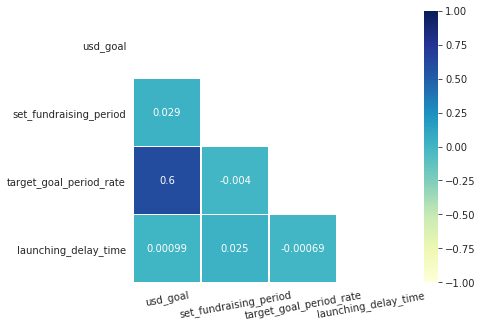

In [72]:
# 연속형 변수 상관관계 히트맵 그래프
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_df, vmin=-1, vmax=1, cmap="YlGnBu", annot=True, square=True, linewidth=0.5, mask=mask)
plt.xticks(rotation=10)
plt.show()

1    93112
0    60464
Name: state, dtype: int64
1    0.606293
0    0.393707
Name: state, dtype: float64


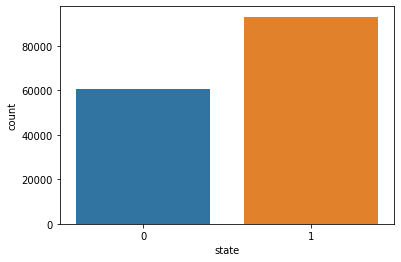

In [78]:
# 타깃('state') 분포 재확인
print(metadata['state'].value_counts())
print(metadata['state'].value_counts(normalize=True))
sns.countplot(metadata['state'])
plt.show()